<a href="https://colab.research.google.com/github/Ashvini-Gabhane/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Ashwini_Gabhane_Netflix_movies_and_tv_shows_clustering_capstone_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Unsupervised ML - Netflix Movies and TV Shows Clustering



##### **Project Type**    - EDA
##### **Contribution**    - Individual : Ashvini Gabhane

# **Project Summary -**

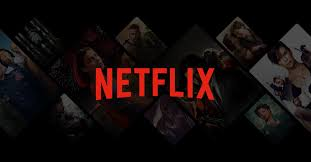



Netflix, Inc. is a company from the United States that provides a service where you can watch videos whenever you want after subscribing. It's like a streaming service and is located in Los Gatos, California. It was started by Reed Hastings and Marc Randolph in 1997 in Scotts Valley, California. They have a collection of movies and TV shows that they show through agreements with others, as well as their own creations called Netflix Originals.

In this project,i have done following things:-

1. Exploratory Data Analysis.

2. Understanding what type content is available in different countries.

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features.

# **GitHub Link -**

https://github.com/Ashvini-Gabhane

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

#### **Define Your Business Objective?**

Personalized Recommendations: Enhance user experience by providing more accurate and personalized recommendations. Clustering content can help identify user preferences and suggest similar shows or movies.

Content Curation and Discovery: Improve content discovery by organizing the vast library of movies and TV shows into meaningful clusters. This helps users easily find new content that matches their interests.

User Engagement and Retention: Increase user engagement and retention by keeping users hooked with content that aligns with their tastes. Effective clustering can lead to higher satisfaction and longer subscription durations.

Marketing and Promotion: Develop targeted marketing and promotional strategies based on user preferences. Clustering can identify popular genres or themes, allowing for more effective advertising campaigns.

Content Acquisition and Production: Inform content acquisition and production decisions by identifying trends and gaps in the current library. Clustering can reveal popular genres or niches that are underrepresented, guiding future investments.

User Segmentation: Segment users based on their viewing habits and preferences. This can help in creating tailored experiences and offers for different user groups.

Content Licensing and Partnerships: Make data-driven decisions regarding content licensing and partnerships by understanding the performance and popularity of different content clusters.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [ ]:

pip install -U kaleido

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

netflix_movies1= pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_movies1.head()

In [ ]:
netflix_movies1.tail()

In [ ]:
netflix_movies1['title'].value_counts()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
netflix_movies1.index

In [ ]:
netflix_movies1.shape

In [ ]:
netflix_movies1.columns

### Dataset Information

In [ ]:
# Dataset Info
netflix_movies1.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_movies1.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_movies1.isnull().sum()

In [ ]:
netflix_movies1.isnull().sum().sum()

In [ ]:
# Visualizing the missing values
netflix_movies1['cast'].fillna(value='No cast',inplace=True)
netflix_movies1['country'].fillna(value=netflix_movies1['country'].mode()[0],inplace=True)

In [ ]:
netflix_movies1.shape

### What did you know about your dataset?

This dataset contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title. It consists of 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_movies1.columns

In [ ]:
# Dataset Describe
netflix_movies1.describe(include='all')

### Variables Description

Attribute Information

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(netflix_movies1.apply(lambda col: col.unique()))

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.
netflix_movies1["date_added"] = pd.to_datetime(netflix_movies1['date_added'], format='%B %d, %Y', errors='coerce')  # Handle potential errors and convert date_added to date time format.
netflix_movies1['day_added'] = netflix_movies1['date_added'].dt.day            # Compute day.
netflix_movies1['year_added'] = netflix_movies1['date_added'].dt.year          # Compute year.
netflix_movies1['month_added'] = netflix_movies1['date_added'].dt.month        # Compute month.

### What all manipulations have you done and insights you found?

We can gather the following insights from the dataset:

Director: There are missing values in the "Director" column.

Country: There are missing values in the "Country" column, which have been filled with zero.

Cast: There are missing values in the "Cast" column, which have been filled with "No cast."

Date Added: There are missing values in the "Date Added" column.

Duplicated entries have been identified in the dataset,sum is zero.Unique Values also in each column has to find unique items from different columns.

Date_addded Column: In the "Date Added" column, additional information has been extracted such as the day, month, and year.

In summary, the dataset contains missing values in the director, country, cast, and date added columns. The missing values in the cast column have been filled with "No cast," and the missing values in the country column have been filled with zero. Duplicated entries have been identified, and the sum of values in one column is zero. Each column has different unique values. Additionally, the date added column has been parsed to extract the day, month, and year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
labels = ['TV Show', 'Movie']
values = [netflix_movies1.type.value_counts()[1], netflix_movies1.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))



In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="jpeg", width=800, height=800, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

The specific chart used in the code is a pie chart. I picked this chart because it is effective in visualizing the distribution of categorical data. In this case, the chart is used to represent the types of content watched on Netflix, which are categorized as "TV Show" and "Movie."

##### 2. What is/are the insight(s) found from the chart?

TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.9%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The data indicates a clear preference for TV shows over movies, with a significantly higher percentage of 69.1% compared to the lower percentage of 30.9% for movies. This suggests that people tend to enjoy shorter formats like TV shows rather than investing their time in longer movies that may be less engaging.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
import plotly.graph_objects as go
import pandas as pd
tv_show = netflix_movies1[netflix_movies1["type"] == "TV Show"]
movie = netflix_movies1[netflix_movies1["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color='#008000', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#ffd700', line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()

In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1200, height=500, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

The line chart is suitable for showing the trend and distribution of data over a continuous axis (in this case, the years). It allows for easy comparison between the two categories (TV shows and movies) and how their counts vary over time.

##### 2. What is/are the insight(s) found from the chart?


The trend in the visualization indicates that between 2008 and 2022, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights indicate a positive impact for Netflix as the demand for both TV shows and movies on the platform has been increasing rapidly over the years. This growth presents an opportunity for Netflix to provide more high-quality content to its users, thereby enhancing user satisfaction and engagement.

#### Chart - 3

In [ ]:


# Create a DataFrame to store month values and counts
months_df = pd.DataFrame(netflix_movies1['month_added'].value_counts()).reset_index()

# Rename the columns to "month" and "count"
months_df.columns = ['month', 'count']

# Create the bar chart
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#0000FF', '#FFFF00'])

# Update the layout of the chart
fig.update_layout(
    title={
        'text': 'Month wise Addition of Movies and TV Shows on Netflix',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    autosize=False,
    width=1000,
    height=500,
    showlegend=True
)

# Show the chart
fig.show()


In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1000, height=500, scale=1)
Image(img_bytes)


##### 1. Why did you pick the specific chart?


The bar graph is good for showing and comparing information about different categories (like months) and how many times they appear. This graph helps us see how things were added over the months and if there are any noticeable patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

During the months of October to December, there is a noticeable surge in the number of TV shows and movies being released on the Netflix platform.The months of October to December are known for having various holidays and celebrations, such as Halloween, Diwali, Thanksgiving, and Christmas, which often result in people spending more time at home and seeking entertainment options

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

"The new information about more TV shows and movies on Netflix from October to December could help the business in a good way. Here's why:

Matching what people want during certain months Keeping current customers interested Getting new customers interested"

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added', hue='type',lw=5, data=netflix_movies1, ax=ax,palette=['#FF0000' ,'#0000FF'])

##### 1. Why did you pick the specific chart?

By using a countplot, we can quickly observe and compare how often TV shows and movies are added each month.

##### 2. What is/are the insight(s) found from the chart?

Movies:

It seems that January, October, and December are the most popular months for Netflix to add new movies, in contrast to the rest of the months.

Television Shows:

For TV shows on Netflix, it's noticeable that October, November, and December stand out as the favored months for additions, unlike the other months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding which months are popular for movies and TV shows on Netflix could have a positive effect on the business. Here's the reason why:

1-Meeting Viewer Demand:

2-Capitalizing on Seasonal Trends:

3-Improved Competitiveness:

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
#Analyzing the Variety of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d can be thought of as a code that helps find digits, while the + symbol in regex is like a code that helps find one or more of something.
sns.distplot(movie['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies and Tv shows',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?


The Distplot works well for this analysis because it helps us see how many movies are in various duration ranges.

##### 2. What is/are the insight(s) found from the chart?


The typical duration of movies and TV shows that run for 50 to 150 minutes can change based on the particular content offered on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Catering to Different Tastes: Netflix offers a mix of short and long movies and shows, so people with different preferences and schedules can enjoy what they like.

Keeping People Interested: With shows and movies of different lengths, viewers can pick what suits their free time. This makes people watch more and for longer periods.

More Types of Stories: By having a variety of movie and show lengths, Netflix can have a wider collection of content. This includes different kinds of stories and ways of telling them.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#Checking the distribution of TV SHOWS
plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?


The picture you're talking about is a countplot, which is like a bar chart. It helps us see how often different categories appear in a certain group. In this case, it's used to show how many times each TV show season appears, so we can understand how they're spread out.

##### 2. What is/are the insight(s) found from the chart?

Looking at the graph, we can see that most of the TV shows or web series in the data have just one season. The rest of the shows have at most two, three, four, or five seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes ,Positive Impact because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning. They can allocate resources more efficiently, reduce production costs, and potentially increase the output of content.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
movie['originals'] = np.where(movie['release_year'] == movie['year_added'], 'Yes', 'No')
# "Imagine a chart in the shape of a pie that displays the proportions of two categories in movies: 'originals' and 'others'. This chart uses different slices to represent the percentage of each category."
fig, ax = plt.subplots(figsize=(5,5),facecolor="#660066")
ax.patch.set_facecolor("#660066")
explode = (0, 0.1)
ax.pie(movie['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"blue", 'fontsize': 25}, colors =['red','#F5E9F5'])


##### 1. Why did you pick the specific chart?


The pie chart is a good option for showing how different groups of things are divided up. For example, it's helpful for seeing how much of the whole is taken up by categories like "originals" and "others." It lets you easily compare the sizes of these categories compared to the whole picture.

##### 2. What is/are the insight(s) found from the chart?


From all the movies you can watch on Netflix, about 30% of them were made by Netflix themselves. The other 70% are movies that came out before and were shown through various ways, but later got added to Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Certainly! Getting valuable information can really make a good difference for a business. When we look at how movies are spread out on Netflix, like figuring out how many are made by Netflix itself and how many aren't, Netflix can then make smart choices about what movies to get and make. This helps them improve their service and the shows they create.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
netflix_movies1['cast']

In [ ]:
#seperating actors from cast column
cast = netflix_movies1['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

In [ ]:
cast =cast[cast != 'No cast']

In [ ]:

cast.value_counts()

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))
# Make a list that shows TV show actors separately from the cast column.
top_TVshows_actor = netflix_movies1[netflix_movies1['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor =top_TVshows_actor[top_TVshows_actor != 'No cast']
# Depicting the actor who has shown up in the greatest count of TV shows.
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color='red')
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = netflix_movies1[netflix_movies1['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor =top_movie_actor[top_movie_actor != 'No cast']
# Creating a graph to show the actor who has been in the most movies."
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color='Cyan')
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])


##### 1. Why did you pick the specific chart?


The bars are laid out horizontally so you can read and compare the values more easily. Each bar's length shows how many TV shows or movies an actor was in. The chart has names and is split into two parts. One part is for TV shows and the other is for movies. This setup makes it clear which is which.

##### 2. What is/are the insight(s) found from the chart?


In TV shows, the actor who has appeared the most is Takahiro Sakurai. In the movies section, the actor with the most appearances is Anupam Kher.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
top_10_Genre = netflix_movies1['listed_in'].value_counts().head(10)

fig2 = px.pie(top_10_Genre, values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig2.update_layout(height=600, width=900, title='Top 10 genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=12, color='#FF0000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig2.show()

In [ ]:
from IPython.display import Image
img_bytes = fig2.to_image(format="png", width=1000, height=1000, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

The pie chart's circular shape allows viewers to quickly compare the sizes of different genres by observing the relative areas of the slices. The accompanying labels and percentage values outside the slices provide additional information and enhance the readability of the chart.

##### 2. What is/are the insight(s) found from the chart?

In this chart, the top three genres on Netflix based on their distribution are:

1-Documentaries: 14.4%

2-Stand-up Comedy: 13.9%

3-Drama, International Movies:1 3.8%

These genres have the highest percentages compared to the other genres included in the top 10 list.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from analyzing the distribution of genres on Netflix can potentially help create a positive business impact in several ways

1-Content Curation : By focusing on genres that have high viewer demand, Netflix can ensure that it offers a diverse and appealing selection of movies and shows to its subscribers

2-Targeted Acquisitions and Productions : It can guide them in identifying genres that are in high demand and have a proven audience. This can optimize their investments in content creation and acquisition

3-Personalized Recommendations: Personalized recommendations for individual users, improving their overall experience and encouraging them to spend more time on the platform.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Create subset of dataset with required data.
conuntryVSgenre = netflix_movies1[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  #Next, the function joins all the genre strings together into a single long string using the ", ".join()
  # method and then splits the long string into a list of individual genre strings using the split() method with ", " as the separator.
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

In [ ]:
conuntryVSgenre

In [ ]:
# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [ ]:
country_genre_count_df

In [ ]:
# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen', 'darkred', 'lavender', 'lightcoral', 'navy', 'olive', 'teal', 'turquoise']


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show()

In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1400, height=800, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

It is suitable for showing the distribution of different genres across multiple countries. Each pie chart represents a country, and the slices of the pie represent different genres. The size of each slice indicates the proportion of content in that genre for a particular country. This allows for easy comparison of genre distribution across countries in a visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?

Action & Adventure and Dramas are the most prevalent genres across all countries. They have the highest values in most countries, indicating their popularity.The United States has a diverse content offering across multiple genres, with a strong presence in Action & Adventure, Dramas, Comedies, and Documentaries.

India has a significant focus on Independent Movies and Dramas, with relatively fewer offerings in other genres.

The United Kingdom has a good balance between Drama, International TV Shows, and Documentaries.

Australia's content offering is diverse, with a relatively balanced distribution across various genres such as Dramas, Comedies, International TV Shows, and Documentaries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact in the following ways:

1-Targeted Content Strategy: By understanding the genre preferences in different countries, businesses can develop a targeted content strategy that aligns with the interests of their target audience.

2-Market Expansion:The insights can help businesses identify countries where their content genres are highly popular. This knowledge can guide expansion plans and investment in those markets, increasing the chances of success and profitability.

3-Content Localization: Understanding the genre preferences in different countries can aid in content localization efforts. Adapting content to suit the local preferences can increase its appeal and viewership, potentially leading to business growth.



#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# number of unique values
netflix_movies1['release_year'].nunique()

In [ ]:
print(f'Oldest release year : {netflix_movies1.release_year.min()}')
print(f'Latest release year : {netflix_movies1.release_year.max()}')

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.distplot(netflix_movies1['release_year'], ax=ax[0], kde=False,color='green')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_movies1, order=netflix_movies1['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart combination of a histogram and a grouped bar plot allows for both univariate and bivariate analysis. The histogram provides an overview of the distribution of movie release years, while the bar plot allows for a comparison of the number of movies and TV shows released in the top 15 years.

##### 2. What is/are the insight(s) found from the chart?

The distribution of release years in the histogram shows a general trend of movies being released on Netflix starting from around 1980. The number of releases gradually increases, with significant growth observed from the year 2000 onwards. The highest peak in the distribution is observed between 2010 and 2020, indicating a high number of Movie/Tv shows releases during that period.

In terms of content type (Movies, TV shows), the bar graph highlights that 2017 and 2020 demonstrate the highest trends. These years exhibit a significant number of movie releases, TV show releases, and a combination of both on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. By understanding the distribution of release years and identifying trends, businesses can make informed decisions regarding content acquisition, production, and marketing strategies.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
import folium

# Create a map object
fig = folium.Map(location=[20, 0], zoom_start=2,tiles='stamenterrain')
import folium

# Define a dictionary of country names, coordinates, and colors
countries = {'United States': {'coords': [37.0902, -95.7129], 'color': 'red'},
             'India': {'coords': [20.5937, 78.9629], 'color': 'green'},
             'United Kingdom': {'coords': [55.3781, -3.4360], 'color': 'blue'},
             'Canada': {'coords': [56.1304, -106.3468], 'color': 'orange'},
             'Japan': {'coords': [36.2048, 138.2529], 'color': 'purple'},
             'France': {'coords': [46.2276, 2.2137], 'color': 'pink'},
             'South Korea': {'coords': [35.9078, 127.7669], 'color': 'gray'},
             'Spain': {'coords': [40.4637, -3.7492], 'color': 'black'},
             'Mexico': {'coords': [23.6345, -102.5528], 'color': 'brown'}}

# Loop over the dictionary and add markers for each country
for country, info in countries.items():
    folium.Marker(location=info['coords'], tooltip=country,
                   popup=f"Color: {info['color']}",
                   icon=folium.Icon(color=info['color'])).add_to(fig)

# Display the map
fig

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
netflix_movies1['listed_in'].value_counts().head(25)

In [ ]:
import plotly.express as px
import pandas as pd

counts = netflix_movies1['listed_in'].value_counts().head(10)
average = counts.mean()

df = pd.DataFrame({'Category': counts.index, 'Count': counts.values})
colors = px.colors.qualitative.Dark24[:10]
fig = px.bar(df, x='Category', y='Count', color='Category', color_discrete_sequence=colors)
fig.add_hline(y=average, line_color='red')
fig.update_layout(title='Top 10 Average Genere with Count',title_x=0.3)

fig.show()


In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1300, height=800, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

The chosen chart effectively presents the data, allowing viewers to easily compare the Average counts of different genres.

##### 2. What is/are the insight(s) found from the chart?

The average count of genres in the top 10 categories lies between 200-250. The genre with the highest count among all the genres is Documentaries, with a count of 334.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact for a streaming platform like Netflix or any other company in the entertainment industry.These insights, companies can refine their content strategies, enhance viewer satisfaction, attract a larger audience, and ultimately drive positive business impact in terms of increased viewership, customer retention, and revenue growth

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
#Categorizing the Ratings into Groups
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_movies1['target_ages'] = netflix_movies1['rating'].replace(ratings)


In [ ]:
# Preparing data for heatmap
netflix_movies1['count'] = 1
data = netflix_movies1.groupby('country')['count'].sum().sort_values(ascending=False).reset_index()[:10]
# The line below is changed. We don't need to select 'country' column as it's already there after reset_index()
data = data['country']

df_heatmap = netflix_movies1.loc[netflix_movies1['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()



##### 1. Why did you pick the specific chart?

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### 2. What is/are the insight(s) found from the chart?

In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:

Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.

1.France- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

2.India- It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

3.United Kingdom -It has a relatively high level of interest among adults, with 51% expressing interest.

4.Mexico-Here ,also demonstrates a substantial level of interest, with 77% of adults showing interest in the subject.

5.South Korea , United States- Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

6.Japan- It shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.

7.Canada- It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. The data indicates that Spain, France, India, and Mexico have higher levels of interest in the adults, while Canada has relatively lower interest compared to the other countries.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Data Gathering and Integration: Collect comprehensive data on user behavior, preferences, and content attributes. This includes metadata such as genres, actors, directors, and viewer ratings.

Feature Engineering: Extract relevant features from the data that can effectively characterize each piece of content and user preference. This could involve using techniques like natural language processing (NLP) for textual data and embedding techniques for categorical data.

Clustering Algorithms: Apply advanced clustering algorithms such as k-means, hierarchical clustering, or density-based clustering to group similar content together. These algorithms will use the extracted features to identify patterns and similarities across movies and TV shows.

Evaluation and Validation: Validate the clusters to ensure they are meaningful and align with user expectations. Use metrics like silhouette score or purity measures to assess the quality of clusters generated.

Integration into Recommendation Systems: Integrate the clustered data into Netflix's recommendation systems. This will enhance the accuracy and relevance of content recommendations by offering users movies and TV shows that are similar to their preferences and viewing history.

Monitoring and Optimization: Continuously monitor the performance of the clustering algorithms and recommendation systems. Regularly update the clustering models based on new data and evolving user preferences to maintain effectiveness.

Business Impact Analysis: Measure the impact of clustering on key business metrics such as user engagement, retention rates, and subscriber growth. Conduct A/B testing and analyze user feedback to understand the direct benefits and optimize strategies further.

# **Conclusion**

Director and cast contains a large number of null values so we will drop these 2 columns .
In this data-set there are two types of contents where 30.86% includes TV shows and the remaining 69.14% carries Movies.
We have reached a conclusion from our analysis from the content added over years that Netflix is focusing movies and TV shows (From 2016 data we get to know that Movies is increased by 80% and TV shows is increased by 73% compare)
From the data-set insights we can conclude that the most number of TV Shows released in 2017 and for Movies it is 2020
On Netflix USA has the largest number of contents. And most of the countries preferred to produce movies more than TV shows.
Most of the movies are belonging to 3 categories
TOP 3 content categories are International movies , dramas , comedies.
In text analysis (NLP) I used stop words, removed punctuation's , stemming & TF-IDF vectorizer and other functions of NLP.
Applied different clustering models like K-means, hierarchical, Agglomerative clustering, DBSCAN on data we got the best cluster arrangements.
By applying different clustering algorithms to our data-set .we get the optimal number of cluster is equal to 3
From this clustering analysis we can create Netflix movies and tv shows recommendation systems & also we can use topic modelling.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***